# **Fenerbahçe Coaches Performance Analysis**
## **Exploratory Data Analysis (EDA)**


## 1. Data Loading & Initial Inspection


In [44]:
!pip install openpyxl


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Display / formatting (sadece görünüm) ---
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 140)
pd.set_option("display.float_format", "{:,.2f}".format)  # 2 ondalık

# --- Plot styling (daha temiz görünüm) ---
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["figure.dpi"] = 120

## 2. Feature Engineering


In [46]:
def flag_trophy(text):

    if pd.isna(text):
        return 0

    s = str(text).strip().lower()


    if s in ["", "none", "no trophy", "nan"]:
        return 0


    return 1

df["has_trophy"] = df["trophies_text"].apply(flag_trophy).astype(int)

In [47]:
base_url = "https://raw.githubusercontent.com/tibetarastirek111/Fenerbahce-coach-analysis/main/data/raw/"

url1 = base_url + "fenerbahce_coaches_data.xlsx"
url2 = base_url + "fenerbahce_coaches_data2.xlsx"
url3 = base_url + "fenerbahce_coaches_data3.xlsx"

df1 = pd.read_excel(url1)
df2 = pd.read_excel(url2)
df3 = pd.read_excel(url3)

df = df1.copy()
df.head()


,season,coach_name,is_foreign,nationality,total_matches,win,draw,loss,points_per_game,win_rate,avg_goals_scored,avg_goals_conceded,trophies_text,has_trophy,season_start_year
0,2005-2006,Cristoph Daum,1,Foreign - Germany,49,31,9,9,2.08,0.63,2.40,1.20,NaN,0,2005
1,2006-2007,Arthur Zico,1,Foreign - Brazil,54,33,13,8,2.07,0.61,2.20,1.00,Turkish League Cup,1,2006
2,2007-2008,Arthur Zico,1,Foreign - Brazil,53,30,14,9,1.96,0.57,1.90,1.10,NaN,0,2007
3,2008-2009,Luis Aragonés,1,Foreign - Spain,46,23,12,11,1.76,0.50,1.50,1.00,NaN,0,2008
4,2009-2010,Cristoph Daum,1,Foreign - Germany,46,28,10,8,2.04,0.61,1.80,0.90,NaN,0,2009


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              25 non-null     object 
 1   coach_name          25 non-null     object 
 2   is_foreign          25 non-null     int64  
 3   nationality         25 non-null     object 
 4   total_matches       25 non-null     int64  
 5   win                 25 non-null     int64  
 6   draw                25 non-null     int64  
 7   loss                25 non-null     int64  
 8   points_per_game     25 non-null     float64
 9   win_rate            25 non-null     float64
 10  avg_goals_scored    25 non-null     float64
 11  avg_goals_conceded  25 non-null     float64
 12  trophies_text       5 non-null      object 
 13  has_trophy          25 non-null     int64  
 14  season_start_year   25 non-null     int64  
dtypes: float64(4), int64(7), object(4)
memory usage: 3.1+ KB


In [49]:
df["win_rate_calc"] = df["win"] / df["total_matches"]

## 3. Descriptive Statistics by Coach Nationality


In [50]:
# Coach type labels
df['coach_type'] = df['is_foreign'].map({0: 'Turkish', 1: 'Foreign'})

# Select metrics to summarize
metrics = ['points_per_game', 'win_rate_calc', 'avg_goals_scored', 'avg_goals_conceded', 'has_trophy']


# Group by nationality and calculate descriptive statistics
nationality_stats = df.groupby('coach_type')[metrics].agg(['mean', 'median', 'std', 'min', 'max'])

display(nationality_stats)


points_per_game                       win_rate_calc                       avg_goals_scored                        \
                      mean median  std  min  max          mean median  std  min  max             mean median  std  min  max   
coach_type                                                                                                                    
Foreign               1.85   2.00 0.34 0.93 2.09          0.53   0.58 0.13 0.20 0.63             1.70   1.75 0.44 0.80 2.40   
Turkish               2.01   2.00 0.29 1.44 2.44          0.59   0.60 0.12 0.33 0.76             1.75   1.70 0.25 1.40 2.30   

           avg_goals_conceded                       has_trophy                      
                         mean median  std  min  max       mean median  std min max  
coach_type                                                                          
Foreign                  1.05   1.00 0.19 0.80 1.50       0.17   0.00 0.39   0   1  
Turkish                  1.04   1.10 0.18 0.70 1.30       0.23   0.00 0.44   0   1

## 4. Points Per Game (PPG) Comparison


Average Points Per Game by Coach Nationality:


,is_foreign,points_per_game,coach_type
0,0,2.01,Turkish
1,1,1.85,Foreign


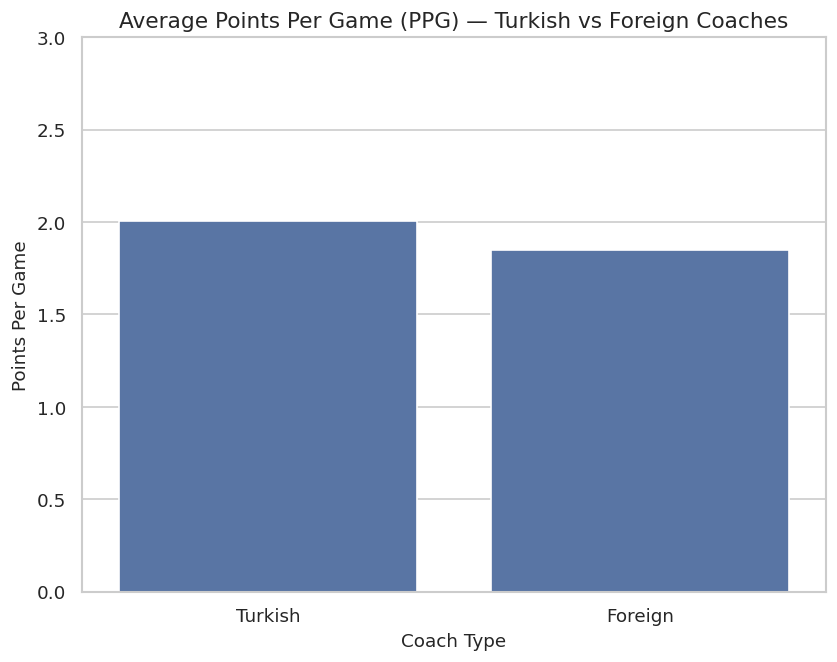

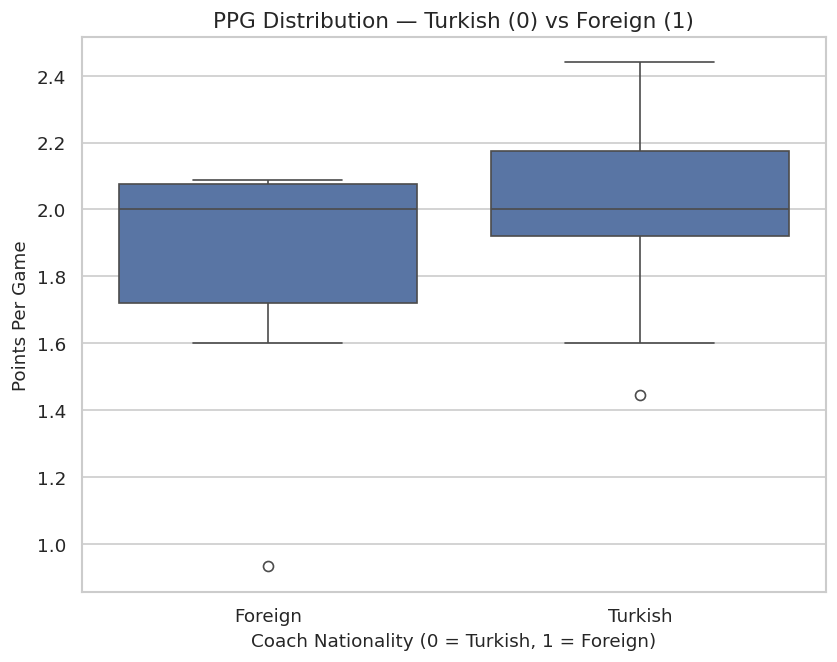

In [51]:
# Grouped mean PPG by nationality
ppg_summary = df.groupby("is_foreign")["points_per_game"].mean().reset_index()
ppg_summary["coach_type"] = ppg_summary["is_foreign"].map({0: "Turkish", 1: "Foreign"})

print("Average Points Per Game by Coach Nationality:")
display(ppg_summary)

# Bar Plot
plt.figure(figsize=(8,6))
sns.barplot(data=ppg_summary, x="coach_type", y="points_per_game", errorbar=None)
plt.title("Average Points Per Game (PPG) — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Points Per Game")
plt.ylim(0, 3)
plt.show()

# Boxplot for distribution comparison
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="coach_type", y="points_per_game")
plt.title("PPG Distribution — Turkish (0) vs Foreign (1)")
plt.xlabel("Coach Nationality (0 = Turkish, 1 = Foreign)")
plt.ylabel("Points Per Game")
plt.show()


## 5. Win Rate Analysis


Win Rate Summary (Turkish vs Foreign):


,mean,median,std,min,max
coach_type,,,,,
Foreign,0.53,0.58,0.13,0.20,0.63
Turkish,0.59,0.60,0.12,0.33,0.76


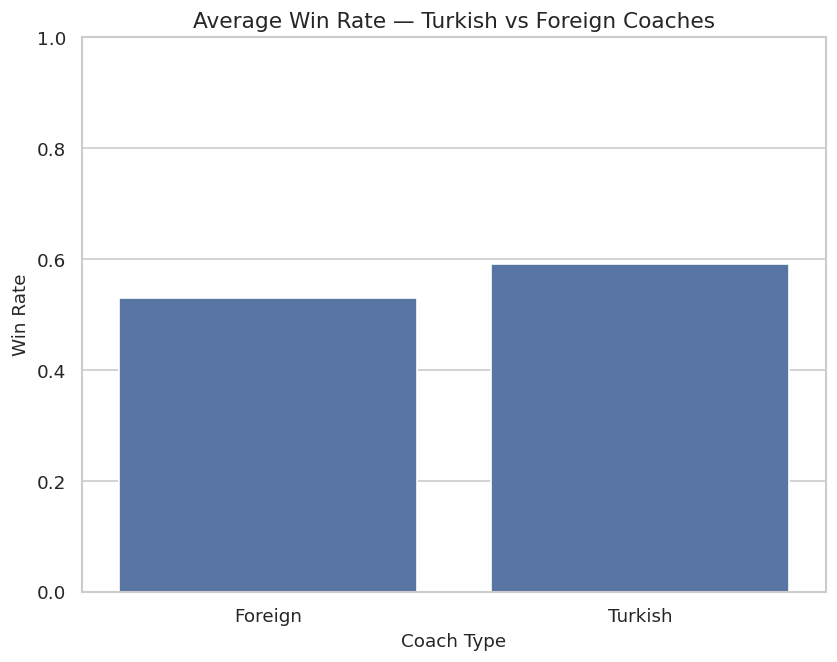

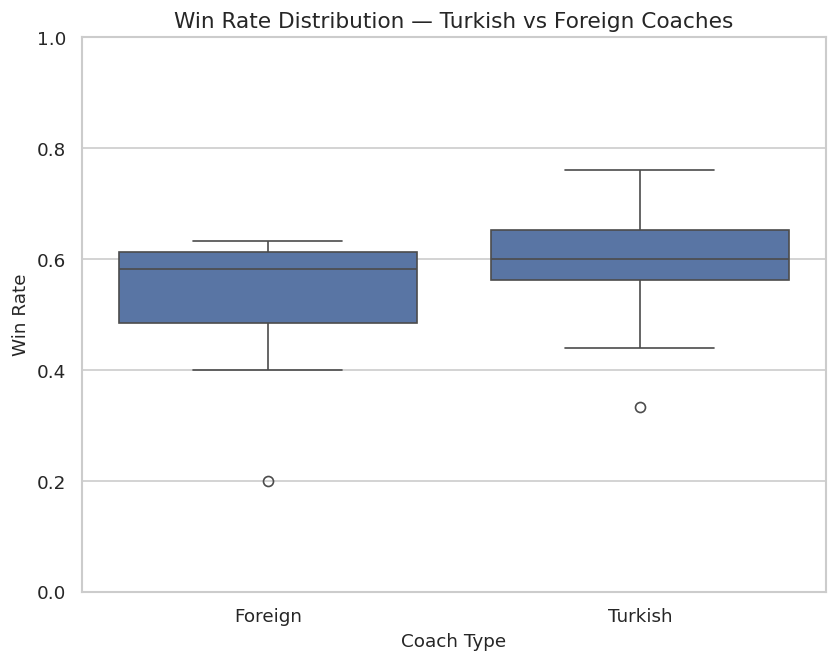

In [52]:
#Comparison of win percentages between groups.

# 1) Summary table of win rate by nationality
win_rate_stats = df.groupby("coach_type")["win_rate_calc"].agg(["mean", "median", "std", "min", "max"])
print("Win Rate Summary (Turkish vs Foreign):")
display(win_rate_stats)

# 2) Bar plot of average win rate
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="coach_type", y="win_rate_calc", errorbar=None)
plt.title("Average Win Rate — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Win Rate")
plt.ylim(0, 1)
plt.show()

# 3) Boxplot for win rate distribution
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="coach_type", y="win_rate_calc")
plt.title("Win Rate Distribution — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Win Rate")
plt.ylim(0, 1)
plt.show()


## 6. Goal Performance Analysis

Goal Performance Summary (Turkish vs Foreign):


avg_goals_scored                       avg_goals_conceded                      
                       mean median  std  min  max               mean median  std  min  max
coach_type                                                                                
Foreign                1.70   1.75 0.44 0.80 2.40               1.05   1.00 0.19 0.80 1.50
Turkish                1.75   1.70 0.25 1.40 2.30               1.04   1.10 0.18 0.70 1.30

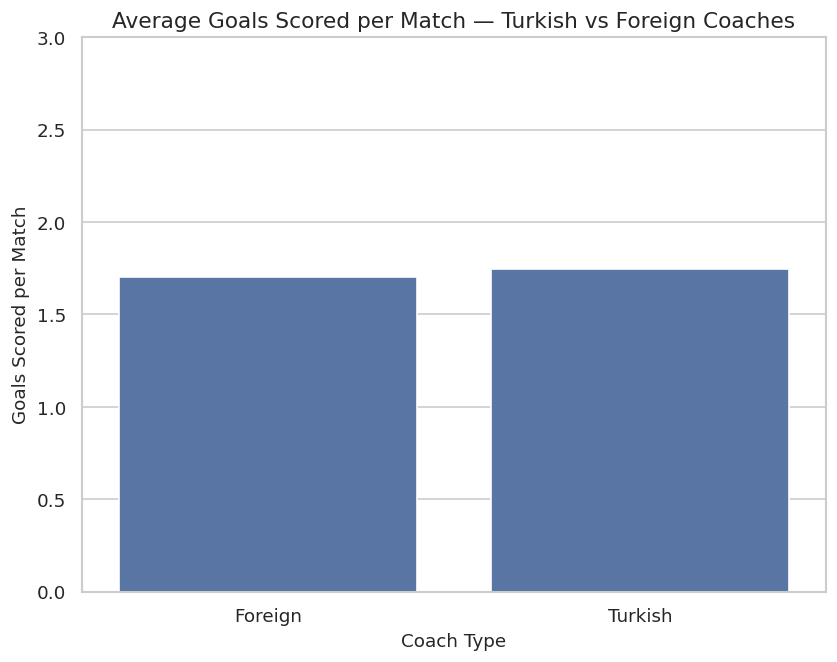

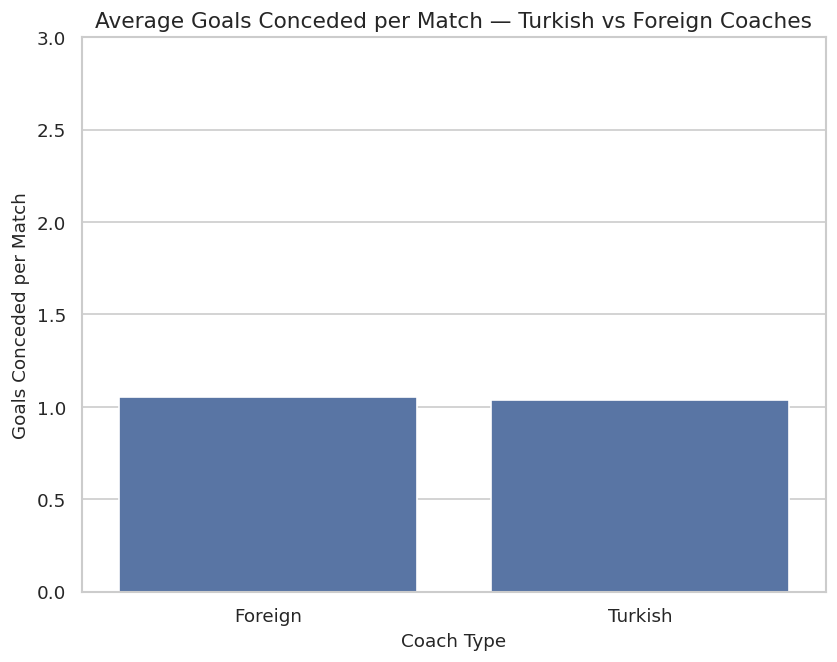

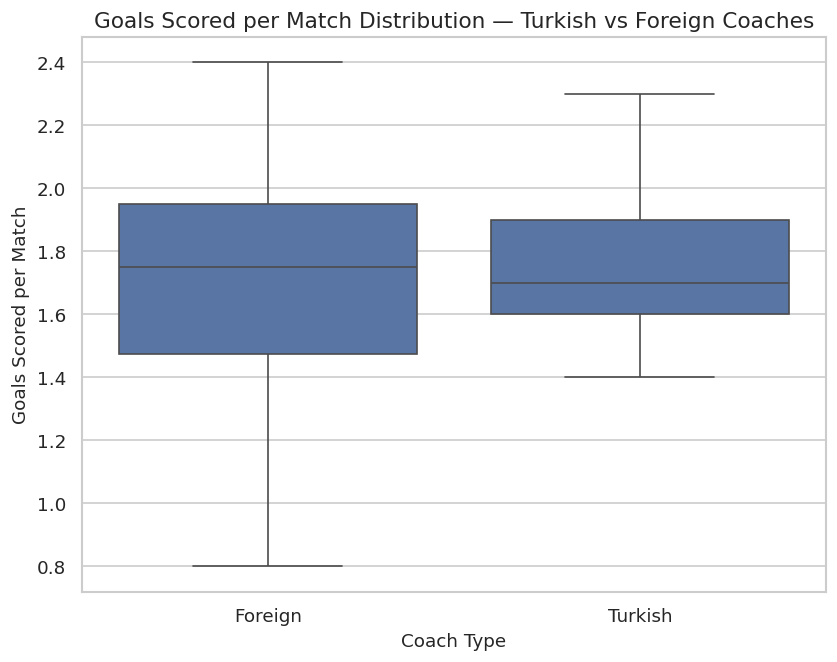

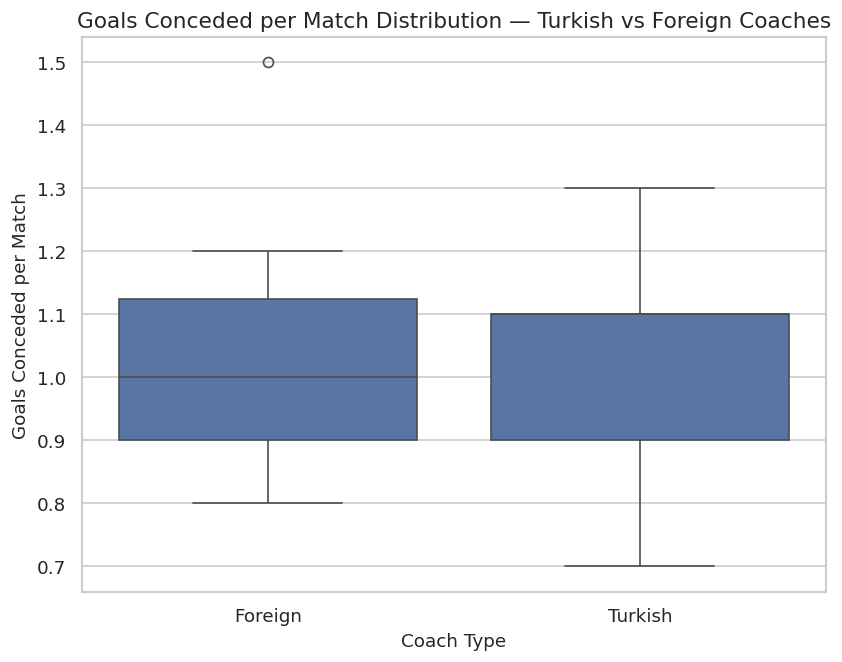

In [62]:
#Comparison of average goals scored and conceded per match for each nationality group.
# --- Goal Performance: Goals Scored & Conceded per Match by Nationality ---

# 1) Summary: average goals scored & conceded per match
goal_stats = df.groupby("coach_type")[["avg_goals_scored", "avg_goals_conceded"]].agg(["mean", "median", "std", "min", "max"])
print("Goal Performance Summary (Turkish vs Foreign):")
display(goal_stats)

# 2a) Bar plot — average goals scored
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="coach_type", y="avg_goals_scored", errorbar=None)
plt.title("Average Goals Scored per Match — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Goals Scored per Match")
plt.ylim(0, 3)
plt.show()

# 2b) Bar plot — average goals conceded
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="coach_type", y="avg_goals_conceded", errorbar=None)
plt.title("Average Goals Conceded per Match — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Goals Conceded per Match")
plt.ylim(0, 3)
plt.show()

# 3a) Boxplot — distribution of goals scored
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="coach_type", y="avg_goals_scored")
plt.title("Goals Scored per Match Distribution — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Goals Scored per Match")
plt.show()

# 3b) Boxplot — distribution of goals conceded
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="coach_type", y="avg_goals_conceded")
plt.title("Goals Conceded per Match Distribution — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Goals Conceded per Match")
plt.show()


## 7. Trophy Achievement Analysis


Trophy Rate Summary (Turkish vs Foreign):


,total_seasons,seasons_with_trophy,trophy_rate
coach_type,,,
Foreign,12,2,0.17
Turkish,13,3,0.23


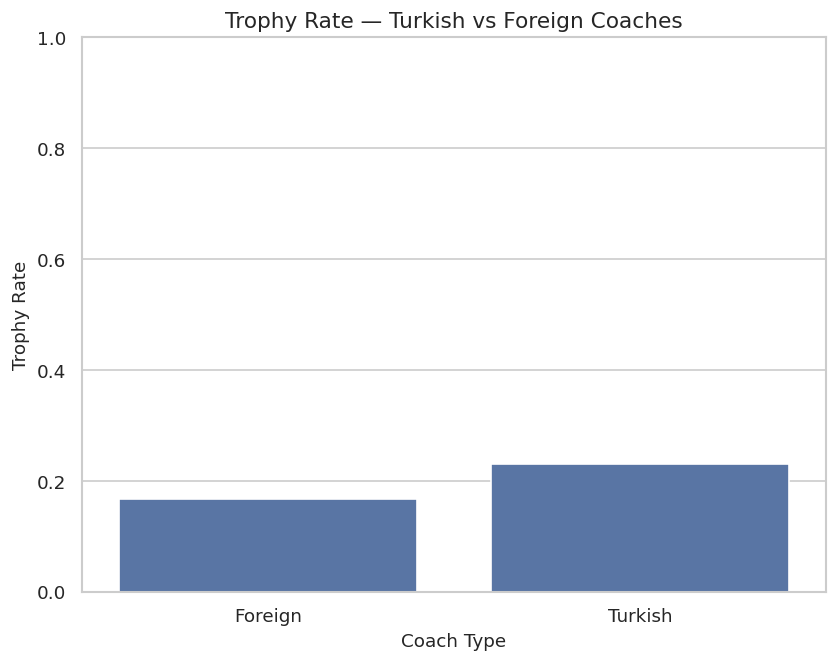

In [63]:
#Calculation of trophy rate:
#trophy_rate = total seasons with trophy / total seasons coached
#Comparison between Turkish and foreign coaches.
# --- Trophy Achievement Analysis: Turkish vs Foreign Coaches ---

# 1) Trophy rate computation
trophy_summary = df.groupby("coach_type")["has_trophy"].agg(
    total_seasons="count",
    seasons_with_trophy="sum",
)

# Calculate trophy_rate
trophy_summary["trophy_rate"] = trophy_summary["seasons_with_trophy"] / trophy_summary["total_seasons"]

print("Trophy Rate Summary (Turkish vs Foreign):")
display(trophy_summary)

# 2) Bar Plot — Trophy Rate
plt.figure(figsize=(8,6))
sns.barplot(
    data=trophy_summary.reset_index(),
    x="coach_type",
    y="trophy_rate",
    errorbar=None
)
plt.title("Trophy Rate — Turkish vs Foreign Coaches")
plt.xlabel("Coach Type")
plt.ylabel("Trophy Rate")
plt.ylim(0, 1)
plt.show()


## 8. Performance Trends Over Time


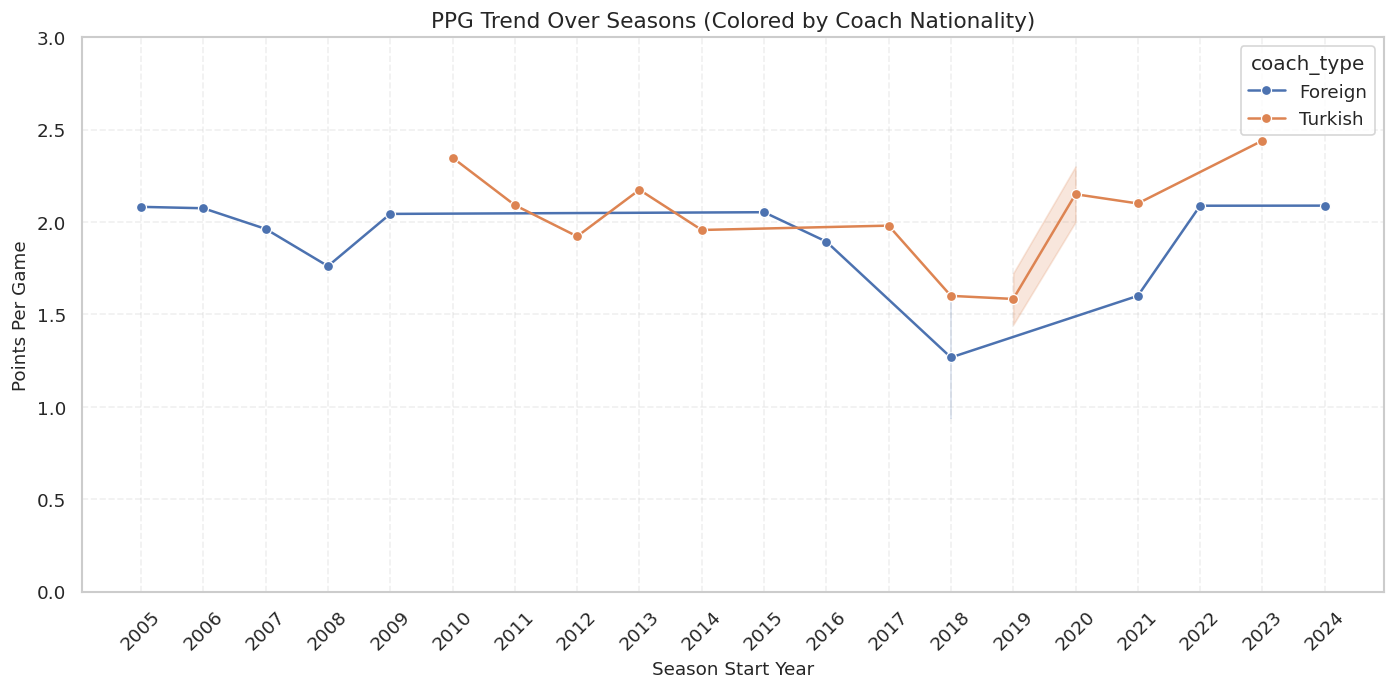

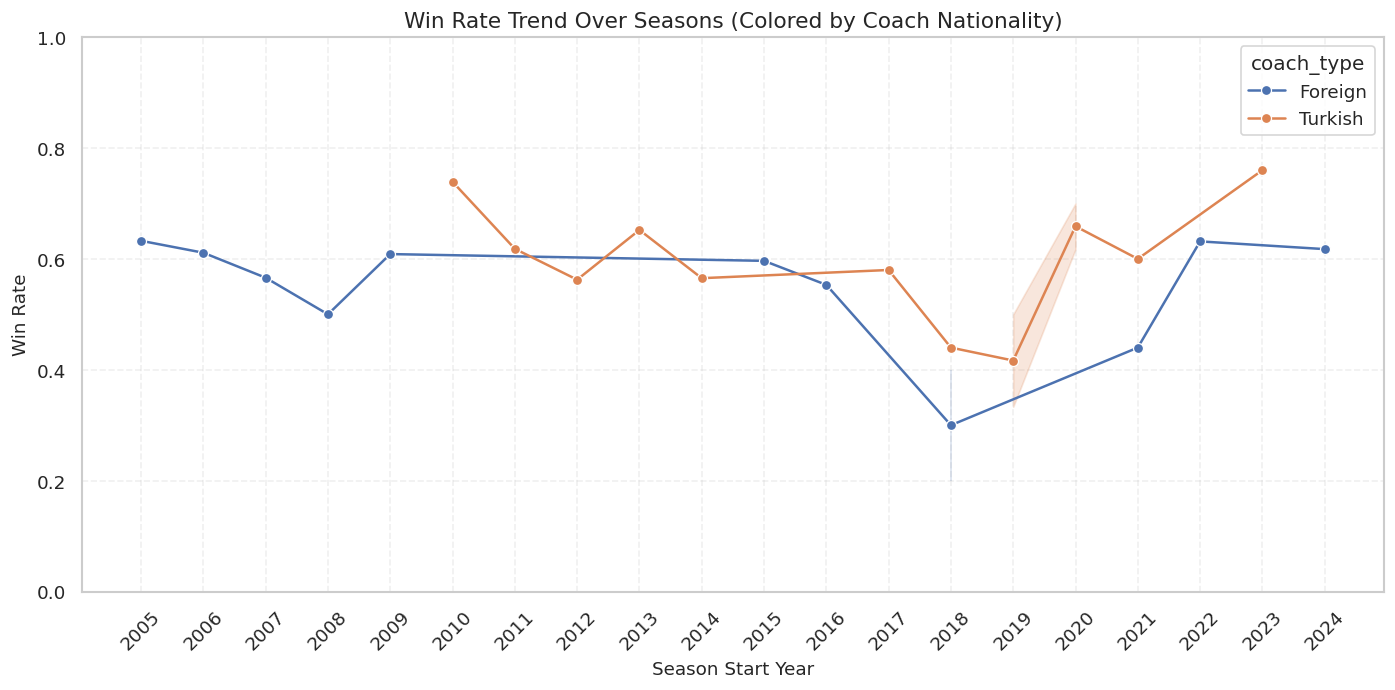

In [64]:
#Line plots of PPG and win rate over seasons, colored by coach nationality.
#Identification of periods dominated by domestic or foreign coaches.
# --- Trend Over Time: PPG and Win Rate by Season and Nationality ---

# Ensure correct season sorting
df_sorted = df.sort_values("season_start_year")

# 1) PPG Trend Over Time
plt.figure(figsize=(14,6))
sns.lineplot(
    data=df_sorted,
    x="season_start_year",
    y="points_per_game",
    hue="coach_type",
    marker="o"
)
plt.title("PPG Trend Over Seasons (Colored by Coach Nationality)")
plt.xlabel("Season Start Year")
plt.ylabel("Points Per Game")
plt.xticks(df_sorted["season_start_year"].unique(), rotation=45)
plt.ylim(0, 3)
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

# 2) Win Rate Trend Over Time
plt.figure(figsize=(14,6))
sns.lineplot(
    data=df_sorted,
    x="season_start_year",
    y="win_rate_calc",
    hue="coach_type",
    marker="o"
)
plt.title("Win Rate Trend Over Seasons (Colored by Coach Nationality)")
plt.xlabel("Season Start Year")
plt.ylabel("Win Rate")
plt.xticks(df_sorted["season_start_year"].unique(), rotation=45)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


## 9. Coach-Level Performance Summary


In [65]:
# Get all unique coaches in dataset
all_coaches = df["coach_name"].unique()

# Filter dataframe (optional, but keeps structure)
coach_df = df[df["coach_name"].isin(all_coaches)]

# Group and summarize
coach_summary = coach_df.groupby("coach_name").agg(
    seasons=("season", "count"),
    avg_ppg=("points_per_game", "mean"),
    avg_win_rate=("win_rate_calc", "mean"),
    avg_goals_scored=("avg_goals_scored", "mean"),
    avg_goals_conceded=("avg_goals_conceded", "mean"),
    total_trophies=("has_trophy", "sum")
).reset_index()

print("Coach-Level Summary (All Coaches):")
display(coach_summary.round(3))


Coach-Level Summary (All Coaches):


,coach_name,seasons,avg_ppg,avg_win_rate,avg_goals_scored,avg_goals_conceded,total_trophies
0,Arthur Zico,2,2.02,0.59,2.05,1.05,1
1,Aykut Kocaman,4,2.08,0.62,1.80,1.02,2
2,Cristoph Daum,2,2.06,0.62,2.10,1.05,0
3,Dick Advocaat,1,1.89,0.55,1.70,1.10,0
4,Emre Belözoğlu,1,2.30,0.70,1.80,1.10,0
5,Erol Bulut,1,2.00,0.62,1.80,1.10,0
6,Ersun Yanal,3,1.83,0.53,1.67,1.10,1
7,Erwin Koeman,1,1.60,0.40,1.20,1.20,0
8,Jorge Jesus,1,2.09,0.63,2.10,0.90,1
9,Jose Mourinho,1,2.09,0.62,1.80,0.90,0


## 10. Coach Comparison Analysis


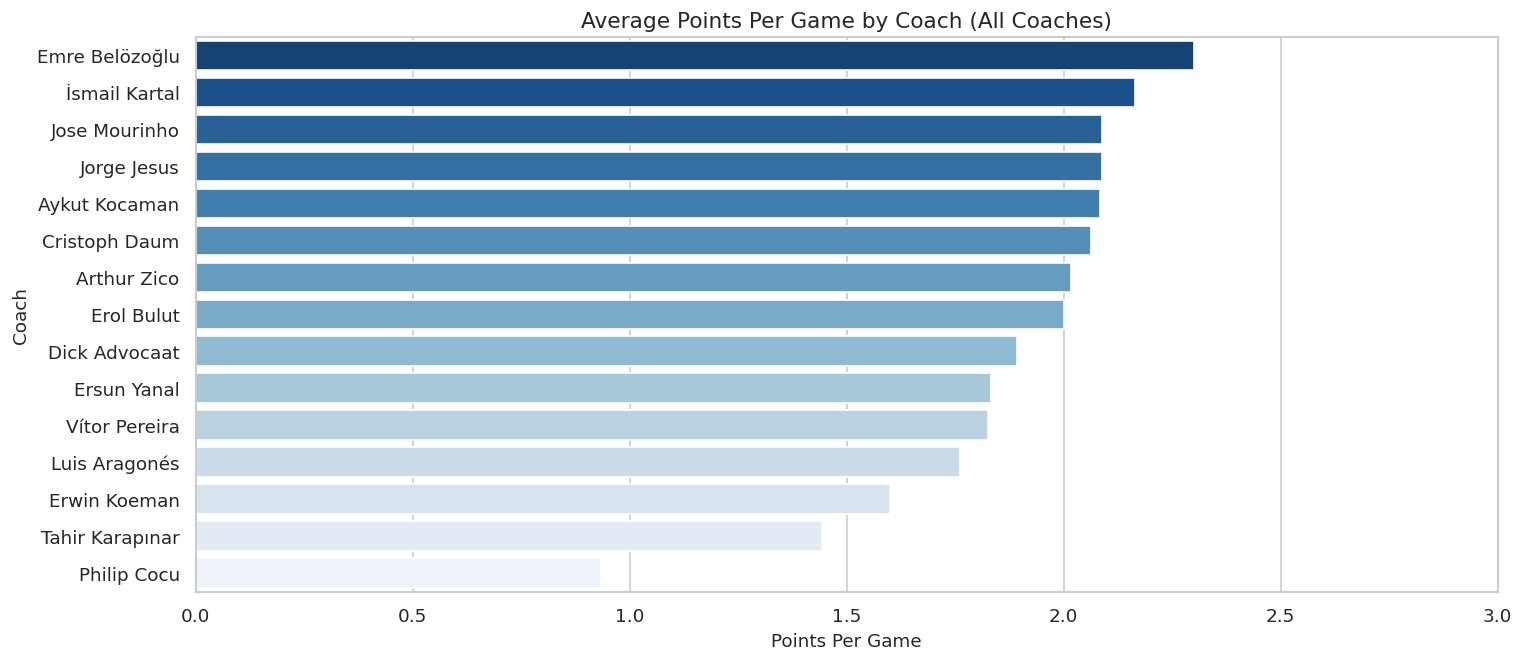

In [66]:
sorted_ppg = coach_summary.sort_values("avg_ppg", ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(
    data=sorted_ppg,
    x="avg_ppg",
    y="coach_name",
    hue="coach_name",
    palette="Blues_r",
    legend=False
)
plt.title("Average Points Per Game by Coach (All Coaches)")
plt.xlabel("Points Per Game")
plt.ylabel("Coach")
plt.xlim(0, 3)
plt.show()


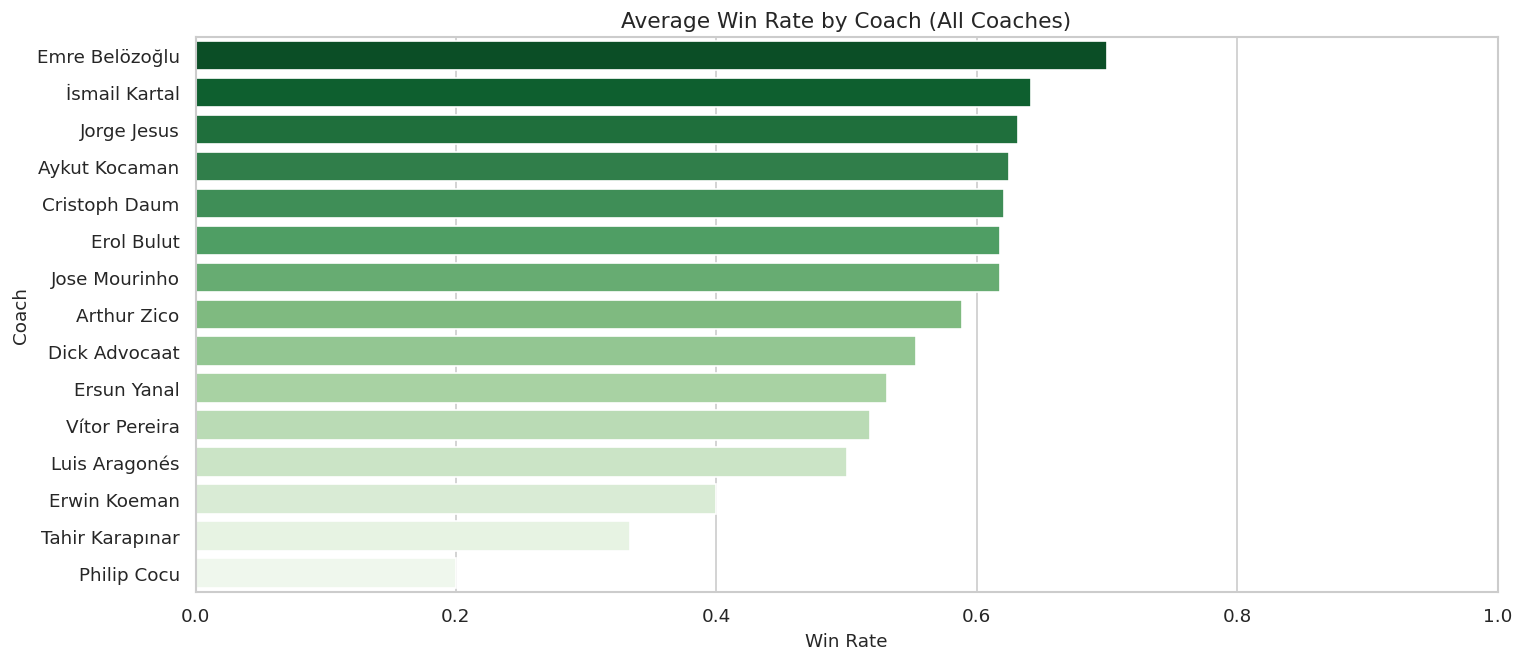

In [67]:
sorted_wr = coach_summary.sort_values("avg_win_rate", ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(
    data=sorted_wr,
    x="avg_win_rate",
    y="coach_name",
    hue="coach_name",
    palette="Greens_r",
    legend=False
)
plt.title("Average Win Rate by Coach (All Coaches)")
plt.xlabel("Win Rate")
plt.ylabel("Coach")
plt.xlim(0, 1)
plt.show()


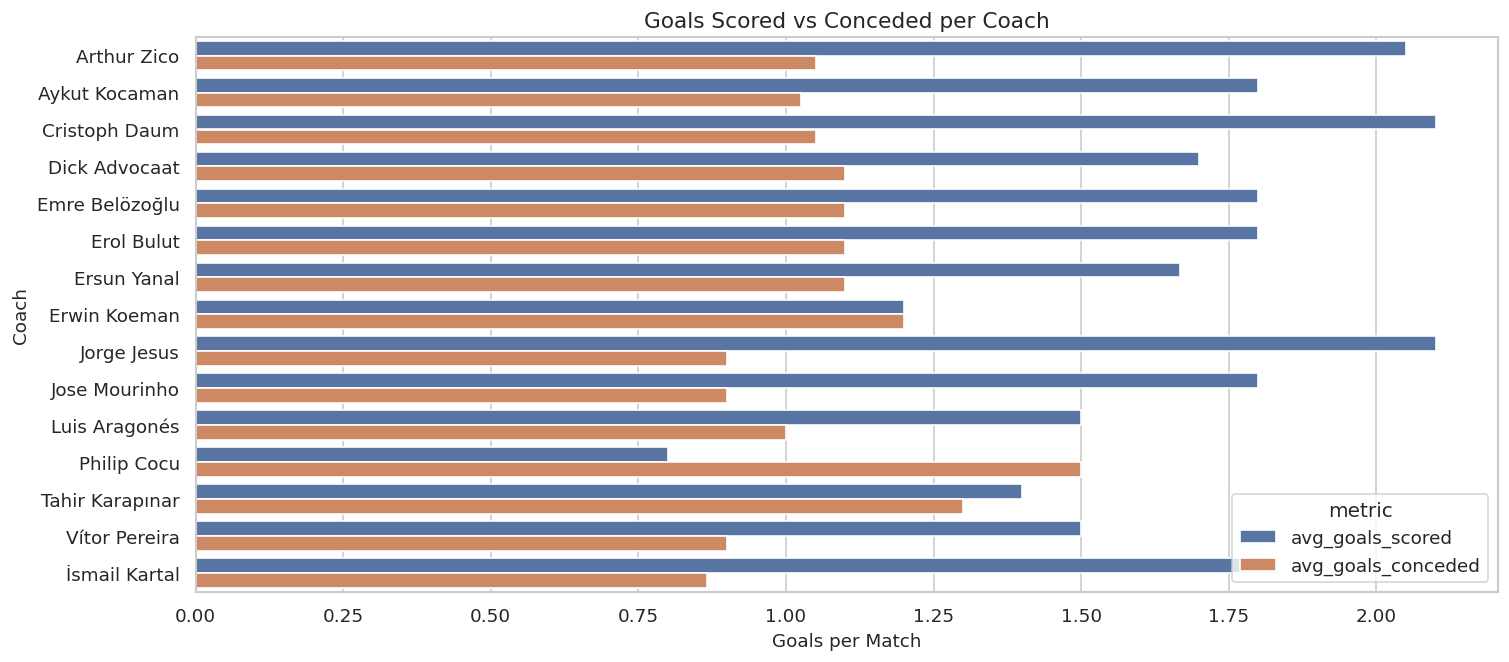

In [68]:
goals_melted = coach_summary.melt(
    id_vars="coach_name",
    value_vars=["avg_goals_scored", "avg_goals_conceded"],
    var_name="metric",
    value_name="value"
)

plt.figure(figsize=(14,6))
sns.barplot(
    data=goals_melted,
    x="value",
    y="coach_name",
    hue="metric",
    errorbar=None
)
plt.title("Goals Scored vs Conceded per Coach")
plt.xlabel("Goals per Match")
plt.ylabel("Coach")
plt.show()


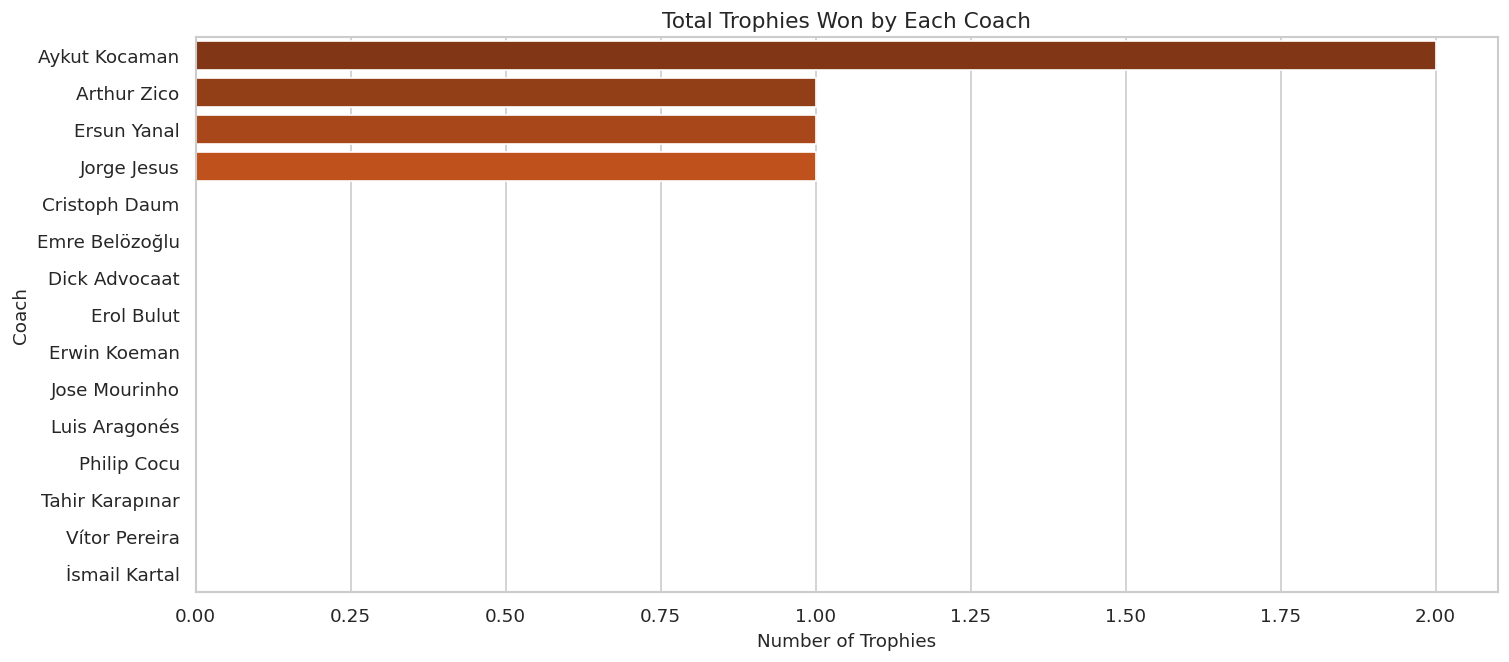

In [69]:
sorted_trophies = coach_summary.sort_values("total_trophies", ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(
    data=sorted_trophies,
    x="total_trophies",
    y="coach_name",
    hue="coach_name",
    palette="Oranges_r",
    legend=False,
    errorbar=None
)
plt.title("Total Trophies Won by Each Coach")
plt.xlabel("Number of Trophies")
plt.ylabel("Coach")
plt.show()
